## `Tarea 3: conjunto de Mandelbrot`

Introducción: 

* En esta tarea, se debe programar y vizualizar este algoritmo pixel counting además de vizualizar el conjunto de Mandelbrot

### 1)¿Cual es el dominio $V$ subconjunto de $\mathbb{C}$  que contiene a todo el conjunto de Mandelbrot? 

`Definicion conjunto de Mandelbrot:`
Este conjunto se define como todos los números complejos $c$ tales que la sucesión $x_0 = 0, x_n = x_{2n-1} + c$ con $n = 1, 2, \ldots$ se mantiene acotada en valor absoluto. Es decir, $|x_n|$ es acotado para $n \to \infty$.


Un punto $c$ pertenece al conjunto Mandelbrot si y solo si el termino $|z_n| \leq 2$ para todo $0 \leq n$ como $c = z_1$, $ |c| \leq 2$, esto establece que $C$ siempre estará en el disco cerrado de radio 2 con centro en el origen, Luego V será el conjunto definido de la siguiente forma:
$$V = \{ c \in \mathbb{C} \mid |c| \leq 2 \}$$

Pero por simplicidad, vamos a tomar como area el cuadrado de dimensiones 2x2, ya que el disco cerrado de radio 2 esta contenido dentro de este.


### 2) Programe el método de pixel counting en Python.

In [17]:
# importamos las librerías nesesarias
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

def calc_iter(c, num_iter, actual_xn=0):
    '''
    Dado un 'C' retorna True si este elemento se encuentra en el conjunto de Mandelbrot y retorna
    False si el complejo 'C' no es parte del conjunto  
    '''
    if num_iter == 0:
        return True
    elif abs(actual_xn) >= 2:
        return False 
    else:    
        x_n = actual_xn ** 2 + c
        return calc_iter(c, num_iter - 1, x_n)

# codigo generado por ChatGpt
def generate_random_complex_points(num_points, cota_inferior=-2, cota_superior=2):
    '''
    Genera puntos complejos aleatorios dentro de los límites especificados
    '''
    points = []
    while num_points >= 0:
        real_part = random.uniform(cota_inferior, cota_superior)
        imag_part = random.uniform(cota_inferior, cota_superior)
        points.append(real_part + 1j * imag_part)
        num_points -= 1
    return points

def pixel_counting(points, num_iter):
    '''
    Realiza el conteo de puntos dentro del conjunto para poder 
    '''
    contador_puntos= 0
    
    for i in points:
        if calc_iter(i, num_iter):
            contador_puntos += 1
    
    # linea generada por ChatGpt
    area_estimate = (contador_puntos / len(points)) * (4 * 4)  
    return area_estimate

### 3) Visualize con Matplotlib 
la convergencia de las aproximaciones ˆAk,m(D). Es decir, una figura con k en el eje horizontal y ˆAk,m(D) en el eje ver-
tical, para un m grande.

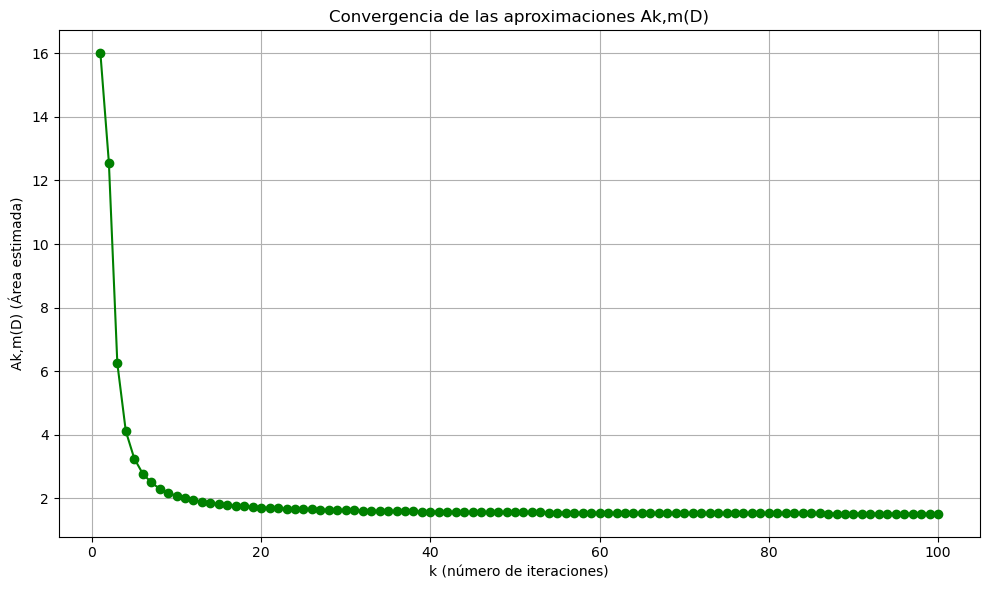

Área aproximada del conjunto de Mandelbrot: 1.51232


In [20]:
# codigo generado con ayuda de chatgpt

# Parámetros
num_points = 50000
num_iter = 100 

# Generar puntos aleatorios
points = generate_random_complex_points(num_points)

# Calcular las aproximaciones para cada k
k_values = list(range(1, num_iter + 1))
area_estimates = []
for k in k_values:
    area_estimate = pixel_counting(points, k)
    area_estimates.append(area_estimate)

# Graficar la convergencia
plt.figure(figsize=(10, 6))
plt.plot(k_values, area_estimates, marker='o', linestyle='-', color='green')
plt.title('Convergencia de las aproximaciones Ak,m(D)')
plt.xlabel('k (número de iteraciones)')
plt.ylabel('Ak,m(D) (Área estimada)')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Área aproximada del conjunto de Mandelbrot: {area_estimates[-1]}')

### 4) Calcule la diferencia con tu estimación y justifique si tu algoritmo es correcto.

las estimaciones comúnes dicen que el área del conjunto es de 1,506. Para la ultima ejecución de mi codigo la diferencia es de 0.006.

La diferencia entre mi estimación y el valor de las estimaciones comunes varía en cada ejecución. esto es debido a que la función random elige puntos aleatorios dentro del dominio escogido. Para una mayor precisión en las estimaciones, conviene elegir una cantidad mayor de puntos. Considero que el algoritmo está correcto, pero es importante mencionar que existen posiblemente mejores algoritmos que podrían proporcionar una mejor aproximación que no dependa de random.

### 5) Visualize el conjunto de Mandelbrot en el plano complejo:

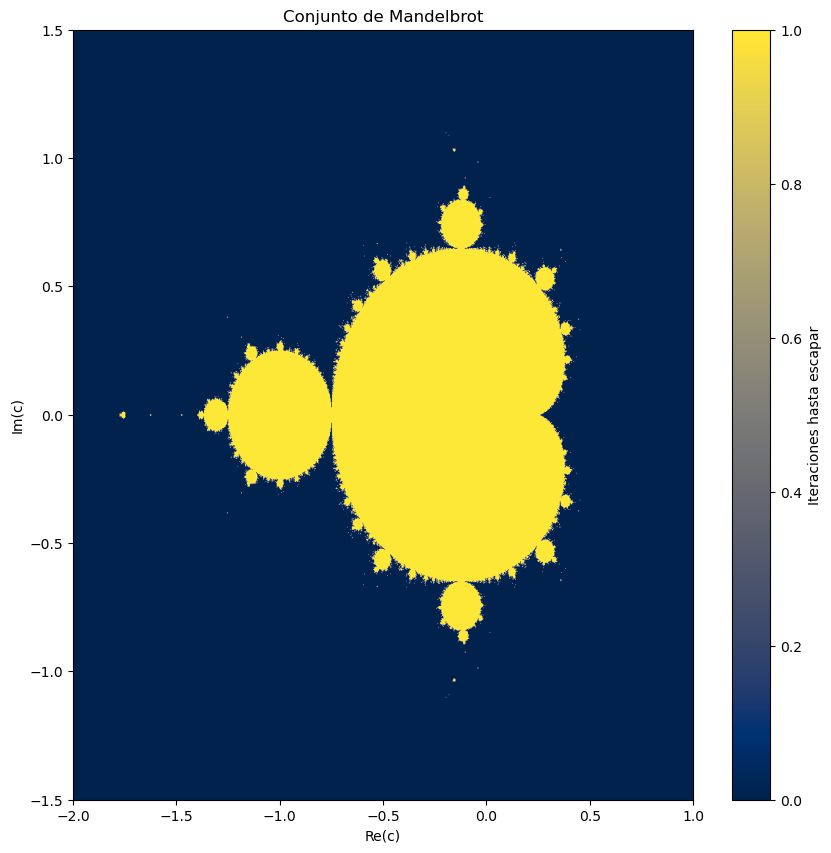

In [19]:
# codigo generado con ayuda de chatgpt

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    '''
    Genera el conjunto de Mandelbrot para el rango dado en el plano complejo
    '''
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    mandelbrot = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            c = x[j] + 1j * y[i]
            mandelbrot[i, j] = calc_iter(c, max_iter)

    return mandelbrot

# Parámetros para generar el conjunto de Mandelbrot
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
width, height = 1000, 1000
max_iter = 100

# Generar el conjunto de Mandelbrot
mandelbrot = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Visualizar el conjunto de Mandelbrot
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot, extent=(xmin, xmax, ymin, ymax), cmap='cividis', origin='lower', aspect='auto')
plt.title('Conjunto de Mandelbrot')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label='Iteraciones hasta escapar')
plt.show()

## Version 2 sacada de internet:

link: https://www.geeksforgeeks.org/mandelbrot-fractal-set-visualization-in-python/

Text(0.5, 1.0, 'Conjunto de Mandelbrot')

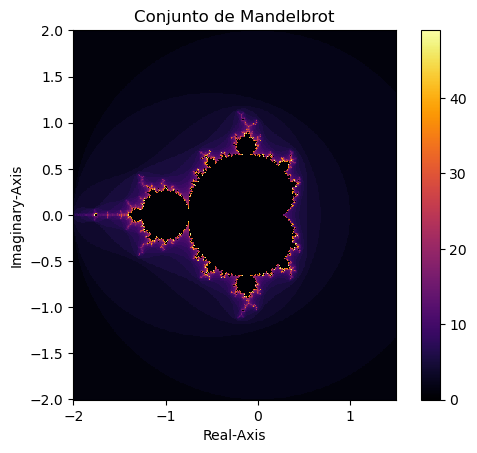

In [23]:

# setting parameters (these values can be changed)
xDomain, yDomain = np.linspace(-2,1.5,500), np.linspace(-2,2,500)
bound = 2
power = 2             # any positive floating point value (n)
max_iterations = 50   # any positive integer value
colormap = 'inferno'    # set to any matplotlib valid colormap
 
 
# computing 2-d array to represent the mandelbrot-set
iterationArray = []
for y in yDomain:
    row = []
    for x in xDomain:
        c = complex(x,y)
        z = 0
        for iterationNumber in range(max_iterations):
            if(abs(z) >= bound):
                row.append(iterationNumber)
                break
            else: z = z**power + c
        else:
            row.append(0)
 
    iterationArray.append(row)
 
# plotting the data
ax = plt.axes()
#plt.rc('text', usetex = True)   # adding this line so that tex can be used
ax.set_aspect('equal')
graph = ax.pcolormesh(xDomain, yDomain, iterationArray, cmap = colormap)
plt.colorbar(graph)
plt.xlabel("Real-Axis")
plt.ylabel("Imaginary-Axis")
plt.title('Conjunto de Mandelbrot')